In [250]:
###set up 

# Python script to run all modules in one go, without generating intermediate files.
from base import *
from distance import *
from greedy import *
from ioUtils import *

from plottingUtils import *

try:
   import cPickle as pickle
except:
   import pickle



In [251]:
### load data and rpreprocesses

trajs = readTrajsFromTxtFile("data/sp500_testlight.txt") #load trajectories
        
rmin, rmax = 0.1, 100 #not sure what this does
        
distPairs1 = process(trajs, rmin, rmax) #compute frechet distances


#distPairs1 is of form {(pth, straj):dist}, change it to distPairs2 of the form {(pth, trajID):[(straj, dist)]}
distPairs2 = {}
for k,v in distPairs1.items():
    pth, trID, dist, straj = k[0], k[1].trajID, v, k[1]
    if (pth, trID) in distPairs2:
        distPairs2[(pth, trID)].append((straj,dist))
    else:
        distPairs2[(pth, trID)] = [(straj,dist)]

print("Computing prerequisite data structures ...")

(strajCov, ptStraj, strajPth, trajCov) = preprocessGreedy(trajs, distPairs2)
  

Computing prerequisite data structures ...


In [258]:
# run greedy algo
(strajCov, ptStraj, strajPth, trajCov) = preprocessGreedy(trajs, distPairs2)     
c1,c2,c3 = 10,1,1
print("Running greedy algorithm ...")
retVal = runGreedy(trajs, distPairs2, strajCov, ptStraj, strajPth, trajCov, c1, c2, c3)

Running greedy algorithm ...
num of points is 4018
num of points is 3936
num of points is 3854
num of points is 3772
num of points is 3690
num of points is 3608
num of points is 3526
num of points is 3444
num of points is 3362
num of points is 3280
num of points is 3198
num of points is 3116
num of points is 3034
num of points is 2952
num of points is 2870
num of points is 2788
num of points is 2706
num of points is 2624
num of points is 2542
num of points is 2460
num of points is 2378
num of points is 2296
num of points is 2214
num of points is 2132
num of points is 2050
num of points is 1968
num of points is 1886
num of points is 1804
num of points is 1722
num of points is 1640
num of points is 1558
num of points is 1476
num of points is 1394
num of points is 1312
num of points is 1230
num of points is 1148
num of points is 1066
num of points is 984
num of points is 902
num of points is 820
num of points is 738
num of points is 656
num of points is 574
num of points is 492
num of poi

In [256]:
for k,v in retVal[0].items():
    print(k)
    for val in v:
            print(val)

Pathlet TrajID 49 ; bounds (0, 81)
Subtraj TrajID 49 ; bounds (0, 81)


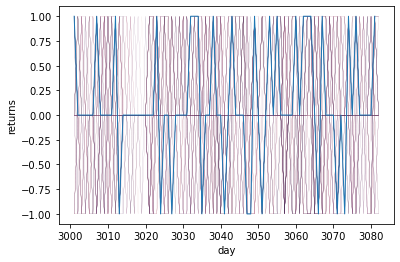

In [257]:
### plot result
plot_clust_result(greedy_result=retVal,
                  traj_dict=trajs)


In [ ]:
# parameter tuning
for c3_it in [100,200,500,1000]:
    print("pre-proc")
    (strajCov, ptStraj, strajPth, trajCov) = preprocessGreedy(trajs, distPairs2)     
    print(c1_it)
    print("Running greedy algorithm ...")
    retVal = runGreedy(trajs, distPairs2, strajCov, ptStraj, strajPth, trajCov, 1, 1, c3_it)
    for k,v in retVal[0].items():
        print(k)
        for val in v:
            print(val)
 